<a href="https://colab.research.google.com/github/three0-s/PRML/blob/main/Ch4.%20Linear%20Regression/Logistic_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multinomial Logistic Classification - MNIST**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [37]:
def sigmoid_basis(x, m=127, s=50):
  return 1 / (1 + np.exp(-(x-m) / s))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target)

X_train = sigmoid_basis(X_train)
X_test = sigmoid_basis(X_test)

lc = LogisticRegression(solver='saga').fit(X_train, Y_train)

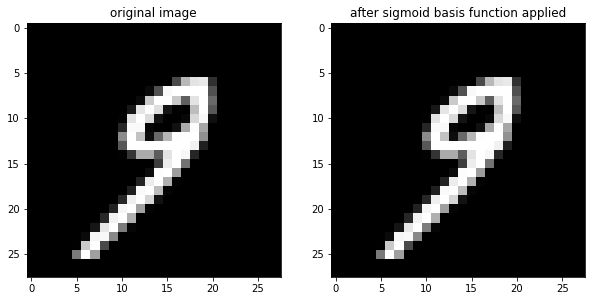

In [39]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(num=1, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(X_train[0], (28, 28)), cmap=plt.cm.gray)
plt.title("original image")

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(sigmoid_basis(X_train[0]), (28, 28)), cmap=plt.cm.gray)
plt.title("after sigmoid basis function applied")

plt.show()

In [9]:
print(lc.score(X_test, Y_test))

0.9189142857142857


f1 score: 91.77


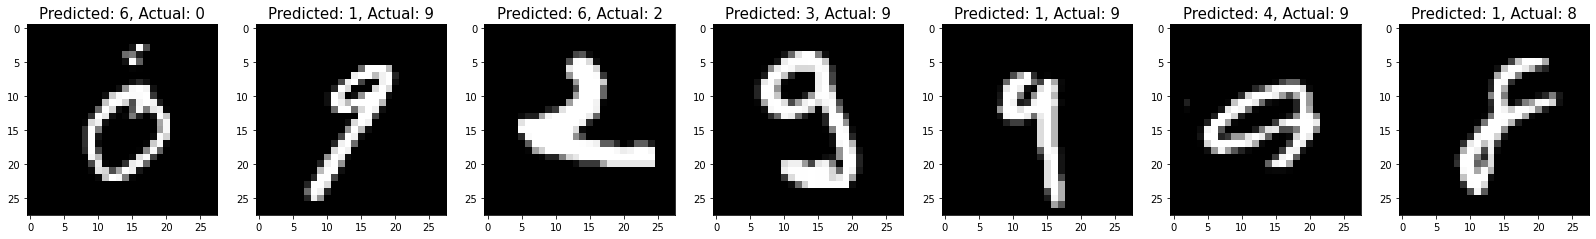

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

index = 0
misclassified = []

pred_test = lc.predict(X_test)
for label, predict in zip(Y_test, pred_test):
#  print(label, predict)
 if label != predict: 
   misclassified.append(index)
 index +=1

plt.figure(figsize=(28,4))
for plotIndex, badIndex in enumerate(misclassified[0:7]):
 plt.subplot(1, 7, plotIndex + 1)
 plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(pred_test[badIndex], Y_test[badIndex]), fontsize = 15)

print("f1 score: {}".format(format(f1_score(Y_test, pred_test, average='macro')*100, ".2f")))